# Explore here

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris

# clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# metricas
from sklearn.metrics import silhouette_score

# reduccion de dimensionalidad
from sklearn.decomposition import PCA

import warnings


In [2]:
warnings.filterwarnings("ignore")

In [3]:
data_1 = "C://Users//samue//OneDrive//Escritorio//4GeeksAcademy//25a clase-Aprendizaje_no_supervisado//unsupervised-ML//data//raw//data.csv"

df = pd.read_csv(data_1)

In [4]:
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


In [5]:
columns = ['Latitude','Longitude','MedInc']

In [6]:
df = df[columns]
df

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [7]:
data = df[columns].values

In [8]:
data, _ = make_blobs(n_samples = 300, centers = 3, random_state = 42)
data

array([[-7.33898809, -7.72995396],
       [-7.74004056, -7.26466514],
       [-1.68665271,  7.79344248],
       [ 4.42219763,  3.07194654],
       [-8.91775173, -7.8881959 ],
       [ 5.49753846,  1.81323115],
       [-2.3360167 ,  9.39960351],
       [ 5.05281029,  1.40944513],
       [-2.98837186,  8.82862715],
       [-3.70050112,  9.67083974],
       [-3.11090424, 10.86656431],
       [ 4.99689432,  1.28026009],
       [-2.30033403,  7.054616  ],
       [-3.92456837,  8.59364081],
       [-7.53026976, -7.36723498],
       [-3.21125072,  8.68662398],
       [-8.50716963, -6.83202465],
       [ 2.61473625,  2.159624  ],
       [-2.41212007,  9.98293112],
       [-1.92234053, 11.20474175],
       [-1.35060204,  8.19360381],
       [-2.67048333,  9.41833699],
       [ 5.61499857,  1.8261123 ],
       [-6.99195524, -7.10107919],
       [-2.97261532,  8.54855637],
       [-6.34982301, -5.43854097],
       [-7.45639852, -6.12471837],
       [ 3.82165815,  4.06555696],
       [ 4.62763206,

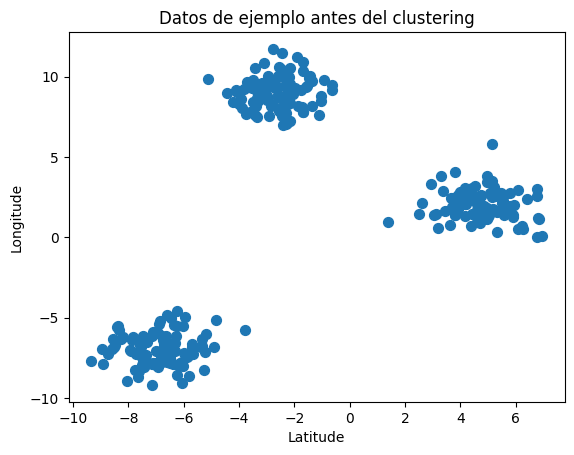

In [9]:
# Visualizar los datos antes del clustering
plt.scatter(data[:, 0], data[:, 1], s=50)
plt.title("Datos de ejemplo antes del clustering")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [11]:
model = KMeans(n_clusters = 3, random_state = 42)
model.fit(data)

KMeans(n_clusters=3, random_state=42)

In [12]:
centroids = model.cluster_centers_
labels = model.labels_

In [13]:
centroids

array([[-2.63323268,  9.04356978],
       [-6.88387179, -6.98398415],
       [ 4.74710337,  2.01059427]])

In [14]:
labels

array([1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2,
       0, 0, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0,
       2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1,
       2, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1,
       0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0,
       2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1], d

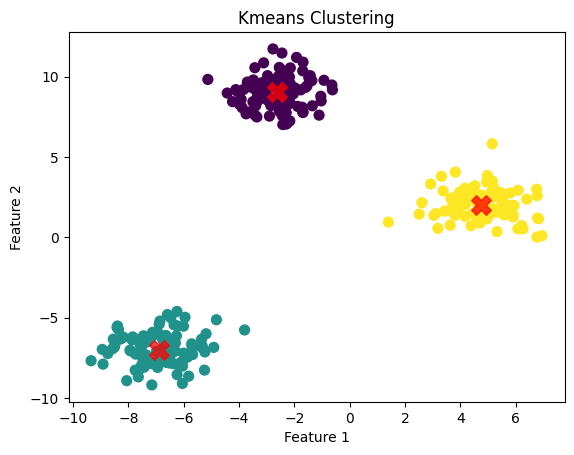

In [16]:
plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title("Kmeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [17]:
# Realizar predicciones con datos nuevos
new_data = np.array([[2, 3], [-5, -5], [-1, 8]])
predictions = model.predict(new_data)

predictions

array([2, 1, 0], dtype=int32)

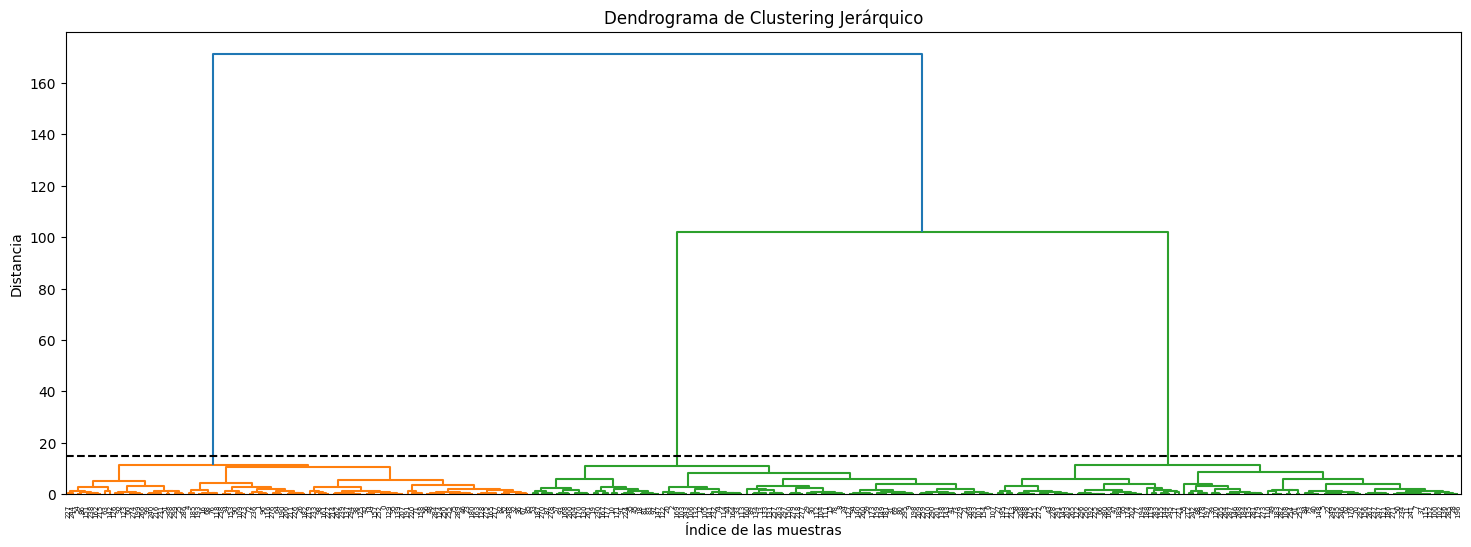

In [19]:
Z = linkage(data, 'ward')

plt.figure(figsize = (18, 6))

dendrogram(Z)
plt.axhline(c='k', linestyle='--', y=15)

plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índice de las muestras')
plt.ylabel('Distancia')
plt.show()

In [20]:
hc = AgglomerativeClustering(n_clusters = 3)

hc.fit(data)

AgglomerativeClustering(n_clusters=3)

Text(0, 0.5, 'Feature 2')

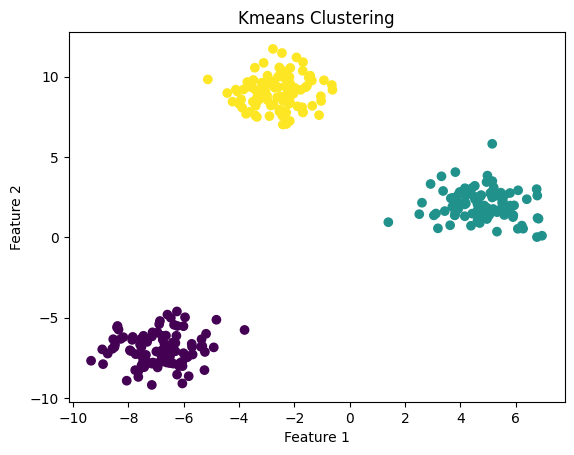

In [21]:
plt.scatter(data[:, 0], data[:, 1], c = hc.labels_)

plt.title('Kmeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

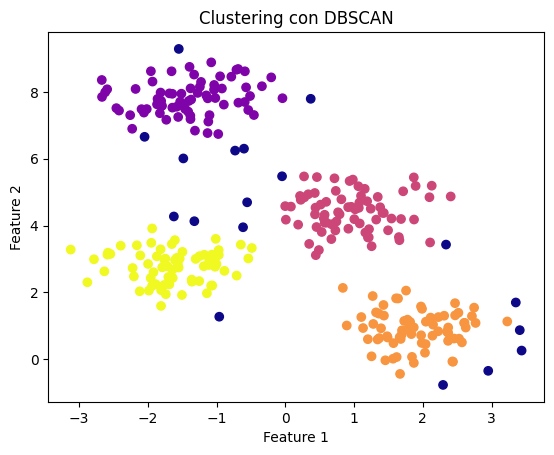

In [23]:
# Generar datos de ejemplo
data, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Aplicar el algoritmo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data)

# Visualizar los resultados
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='plasma')
plt.title("Clustering con DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [25]:
# Generar datos de ejemplo
n_samples = 300
n_features = 2
random_state = 42

data, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=random_state)

# Definir el rango de valores para k
k_values = range(2, 21)
inertias = []

# Calcular la inercia para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

# Imprimir las inercias para cada k
for k, inertia in zip(k_values, inertias):
    print(f'k = {k}, Inercia = {inertia}')

k = 2, Inercia = 5763.464789461435
k = 3, Inercia = 566.8595511244131
k = 4, Inercia = 497.03398814952106
k = 5, Inercia = 428.21421299328415
k = 6, Inercia = 375.0659248776244
k = 7, Inercia = 308.19836610418247
k = 8, Inercia = 272.405731498748
k = 9, Inercia = 234.28072349591127
k = 10, Inercia = 219.04053338999887
k = 11, Inercia = 212.6515587073057
k = 12, Inercia = 195.4853152866297
k = 13, Inercia = 178.16393677802768
k = 14, Inercia = 168.3927940527953
k = 15, Inercia = 160.30342971942414
k = 16, Inercia = 148.54966221058706
k = 17, Inercia = 145.18139168210863
k = 18, Inercia = 136.11568060268445
k = 19, Inercia = 130.0454218130845
k = 20, Inercia = 121.85108275182678
